In [5]:
!unzip archive\ \(3\).zip

Archive:  archive (3).zip
  inflating: Instagram data.csv      


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [8]:
data = pd.read_csv("Instagram data.csv", encoding = 'latin1')

In [9]:
data.head(10)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
5,3884,2046,1214,329,43,74,7,10,144,9,2,Here are some of the most important soft skill...,#data #datascience #dataanalysis #dataanalytic...
6,2621,1543,599,333,25,22,5,1,76,26,0,Learn how to analyze a candlestick chart as a ...,#stockmarket #investing #stocks #trading #mone...
7,3541,2071,628,500,60,135,4,9,124,12,6,Here are some of the best books that you can f...,#python #pythonprogramming #pythonprojects #py...
8,3749,2384,857,248,49,155,6,8,159,36,4,Here are some of the best data analysis projec...,#dataanalytics #datascience #data #machinelear...
9,4115,2609,1104,178,46,122,6,3,191,31,6,Here are two best ways to count the number of ...,#python #pythonprogramming #pythonprojects #py...


In [10]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


<ipython-input-12-79647205e96c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['From Home'])


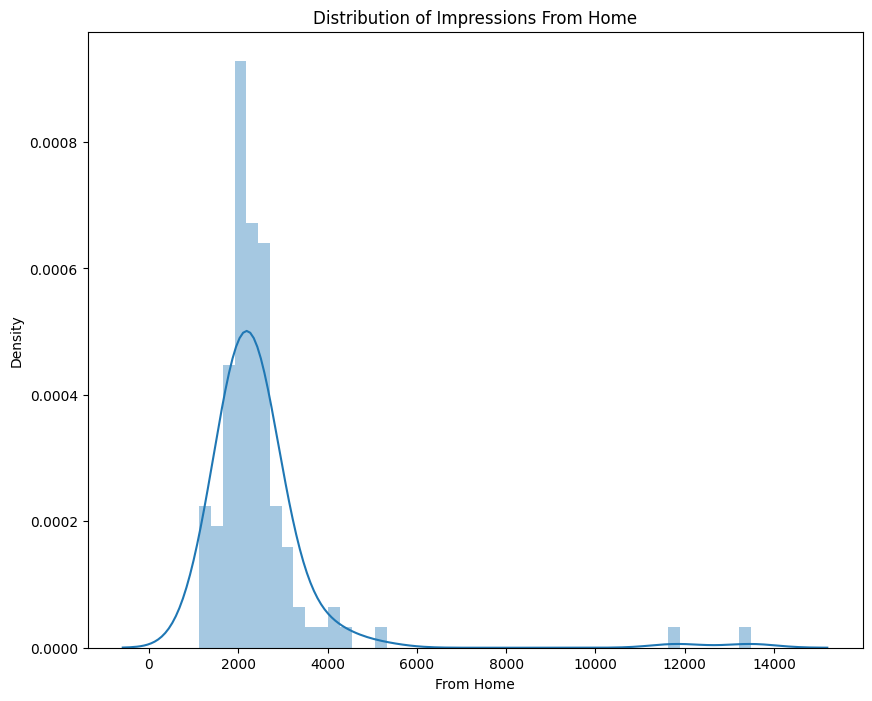

In [12]:
plt.figure(figsize=(10,8))
plt.title("Distribution of Impressions From Home")
sb.distplot(data['From Home'])
plt.show()

<ipython-input-13-ad3c618d6fd6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['From Explore'])


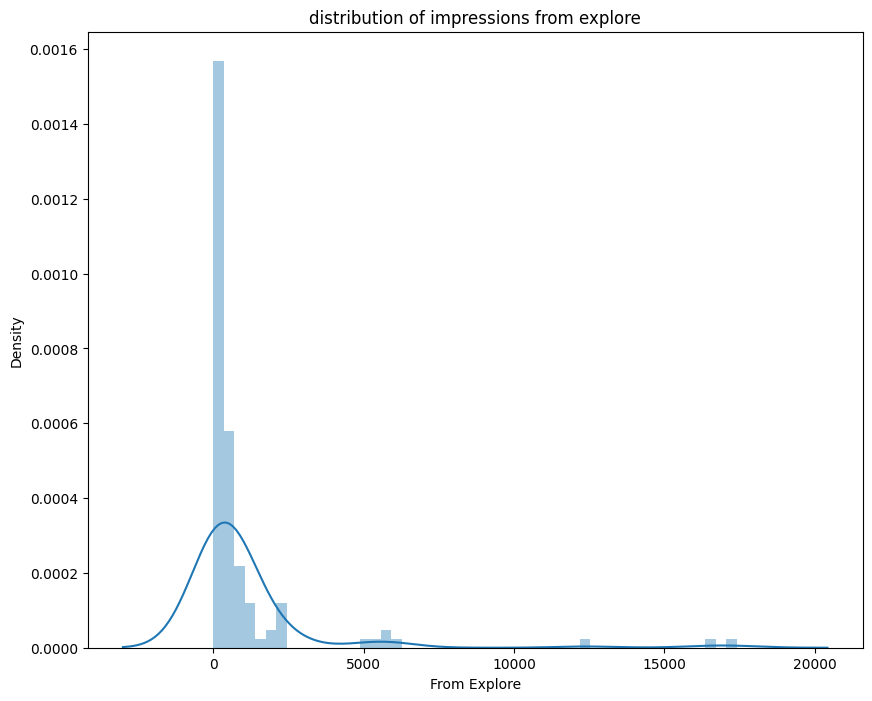

In [13]:
plt.figure(figsize=(10,8))
plt.title("distribution of impressions from explore")
sb.distplot(data['From Explore'])
plt.show()

<ipython-input-14-67df079ec38f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data["From Hashtags"])


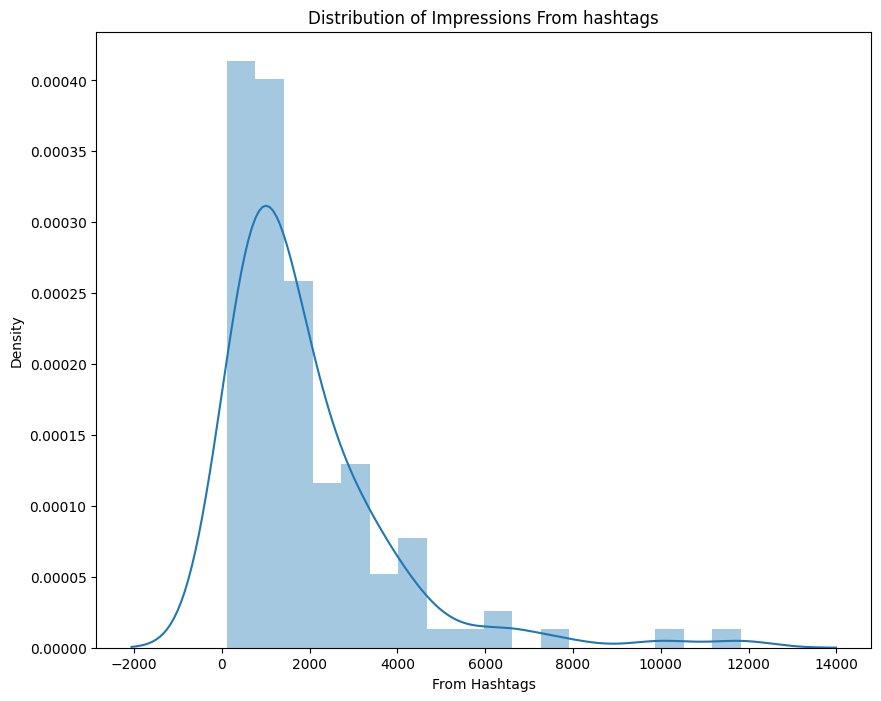

In [14]:
plt.figure(figsize=(10,8))
plt.title("Distribution of Impressions From hashtags")
sb.distplot(data["From Hashtags"])
plt.show()

In [15]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

In [16]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


In [17]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
# model=PassiveAggressiveRegressor()
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.8777977785012779

In [22]:
# from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Predict the target variable for the testing data
ypred = model.predict(xtest)

# Calculate the R-squared value for the model
r2 = r2_score(ytest, ypred)

print("R-squared value:", r2)


R-squared value: 0.8777977785012779


In [29]:
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([11139.58239766])